<a href="https://colab.research.google.com/github/claireshin17/section2project/blob/main/Section_2_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [268]:
!pip install category_encoders
!pip install eli5 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [269]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [270]:
files.upload()
df = pd.read_csv('speed_dating.csv', encoding='latin')

Saving speed_dating.csv to speed_dating (11).csv


In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 195 entries, iid to amb5_3
dtypes: float64(174), int64(13), object(8)
memory usage: 12.5+ MB


In [272]:
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [273]:
df.columns.values

array(['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round',
       'position', 'positin1', 'order', 'partner', 'pid', 'match',
       'int_corr', 'samerace', 'age_o', 'race_o', 'pf_o_att', 'pf_o_sin',
       'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'dec_o', 'attr_o',
       'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o',
       'prob_o', 'met_o', 'age', 'field', 'field_cd', 'undergra',
       'mn_sat', 'tuition', 'race', 'imprace', 'imprelig', 'from',
       'zipcode', 'income', 'goal', 'date', 'go_out', 'career',
       'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums',
       'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater',
       'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy',
       'expnum', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1',
       'shar1_1', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1',
       'shar4_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1',
       'shar2_1', 'attr3_

In [274]:
df = df[['gender', 'int_corr', 'samerace', 'age', 'field_cd', 'race', 'goal', 'date', 'go_out', 'imprace','imprelig', 'attr3_1', 'sinc3_1', 'intel3_1', 'fun3_1', 'amb3_1', 'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1', 'match' ]]

In [275]:
df.head()

,gender,int_corr,samerace,age,field_cd,race,goal,date,go_out,imprace,...,sinc3_1,intel3_1,fun3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,match
0,0,0.14,0,21.0,1.0,4.0,2.0,7.0,1.0,2.0,...,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,0
1,0,0.54,0,21.0,1.0,4.0,2.0,7.0,1.0,2.0,...,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,0
2,0,0.16,1,21.0,1.0,4.0,2.0,7.0,1.0,2.0,...,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1
3,0,0.61,0,21.0,1.0,4.0,2.0,7.0,1.0,2.0,...,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1
4,0,0.21,0,21.0,1.0,4.0,2.0,7.0,1.0,2.0,...,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1


In [276]:
df.dtypes

gender        int64
int_corr    float64
samerace      int64
age         float64
field_cd    float64
race        float64
goal        float64
date        float64
go_out      float64
imprace     float64
imprelig    float64
attr3_1     float64
sinc3_1     float64
intel3_1    float64
fun3_1      float64
amb3_1      float64
attr5_1     float64
sinc5_1     float64
intel5_1    float64
fun5_1      float64
amb5_1      float64
match         int64
dtype: object

In [277]:
nan = df[df.isna().any(axis=1)]
nan

,gender,int_corr,samerace,age,field_cd,race,goal,date,go_out,imprace,...,sinc3_1,intel3_1,fun3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,match
0,0,0.14,0,21.0,1.0,4.0,2.0,7.0,1.0,2.0,...,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,0
1,0,0.54,0,21.0,1.0,4.0,2.0,7.0,1.0,2.0,...,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,0
2,0,0.16,1,21.0,1.0,4.0,2.0,7.0,1.0,2.0,...,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1
3,0,0.61,0,21.0,1.0,4.0,2.0,7.0,1.0,2.0,...,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1
4,0,0.21,0,21.0,1.0,4.0,2.0,7.0,1.0,2.0,...,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7493,0,-0.19,1,NaN,15.0,2.0,1.0,3.0,2.0,1.0,...,8.0,7.0,8.0,7.0,7.0,6.0,6.0,7.0,6.0,0
7494,0,0.26,1,NaN,15.0,2.0,1.0,3.0,2.0,1.0,...,8.0,7.0,8.0,7.0,7.0,6.0,6.0,7.0,6.0,0
7495,0,0.63,1,NaN,15.0,2.0,1.0,3.0,2.0,1.0,...,8.0,7.0,8.0,7.0,7.0,6.0,6.0,7.0,6.0,0
7496,0,0.37,0,NaN,15.0,2.0,1.0,3.0,2.0,1.0,...,8.0,7.0,8.0,7.0,7.0,6.0,6.0,7.0,6.0,0


In [278]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [279]:
df = df.astype({'age':'int', 'field_cd':'category', 'race':'category', 'goal':'category', 'date':'category', 'go_out':'category', 'imprace':'category', 'imprelig':'category', 
                'attr3_1':'category', 'sinc3_1':'category', 'intel3_1':'category', 'fun3_1':'category', 'amb3_1':'category', 'attr5_1':'category', 'sinc5_1':'category', 'intel5_1':'category', 'fun5_1':'category', 'amb5_1':'category'})

In [280]:
df.head()

,gender,int_corr,samerace,age,field_cd,race,goal,date,go_out,imprace,...,sinc3_1,intel3_1,fun3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,match
0,0,0.43,0,22,3.0,6.0,3.0,7.0,3.0,1.0,...,7.0,8.0,8.0,10.0,9.0,6.0,9.0,6.0,10.0,0
1,0,0.46,0,22,3.0,6.0,3.0,7.0,3.0,1.0,...,7.0,8.0,8.0,10.0,9.0,6.0,9.0,6.0,10.0,0
2,0,0.05,0,22,3.0,6.0,3.0,7.0,3.0,1.0,...,7.0,8.0,8.0,10.0,9.0,6.0,9.0,6.0,10.0,0
3,0,0.44,0,22,3.0,6.0,3.0,7.0,3.0,1.0,...,7.0,8.0,8.0,10.0,9.0,6.0,9.0,6.0,10.0,0
4,0,-0.20,0,22,3.0,6.0,3.0,7.0,3.0,1.0,...,7.0,8.0,8.0,10.0,9.0,6.0,9.0,6.0,10.0,0


In [281]:
from sklearn.model_selection import train_test_split

target = 'match'

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='match'), df[target],
                                                    train_size=0.8, test_size=0.2, random_state=2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.8, 
                                                  test_size=0.2, random_state = 2)

In [282]:
X_train.shape

(3089, 21)

In [283]:
y_train.value_counts(normalize = True)

0    0.848171
1    0.151829
Name: match, dtype: float64

In [284]:
from sklearn.metrics import accuracy_score

major = y_train.mode()[0]
y_pred = [major] * len(y_train) # since we're categorizing data we want to work with the mode

accuracy_score(y_train, y_pred)

0.8481709291032696

In [285]:
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(), 
    RandomForestClassifier(n_estimators=100, random_state=2, n_jobs=-1)
)

In [286]:
from sklearn.metrics import classification_report
# train 학습, 검증셋 정확도
pipe.fit(X_train, y_train)
print('검증 정확도', pipe.score(X_val, y_val))

print(classification_report(y_val, pipe.predict(X_val)))

검증 정확도 0.7749029754204398
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       651
           1       0.21      0.16      0.18       122

    accuracy                           0.77       773
   macro avg       0.53      0.52      0.52       773
weighted avg       0.75      0.77      0.76       773



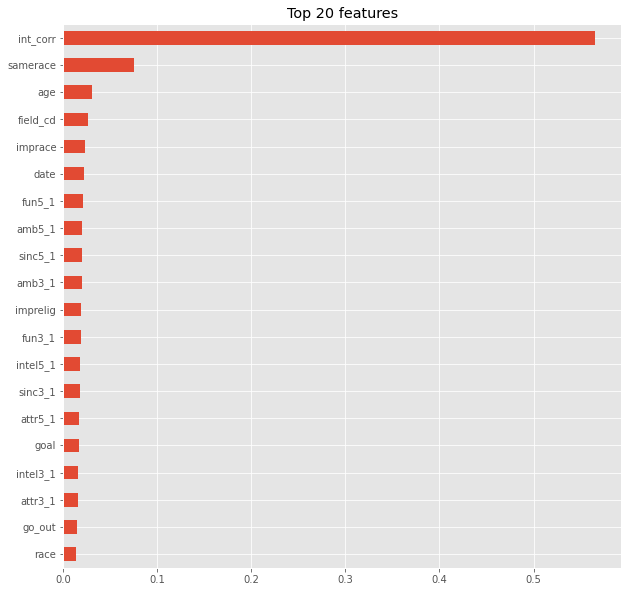

In [287]:
rf = pipe.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)

%matplotlib inline
import matplotlib.pyplot as plt

n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh();

In [288]:

from category_encoders import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer 
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(
    OrdinalEncoder(cols=['imprace', 'imprelig', 'attr3_1', 'sinc3_1', 
                         'intel3_1', 'fun3_1', 'amb3_1', 'attr5_1', 'sinc5_1', 
                         'intel5_1', 'fun5_1', 'amb5_1']), 
    SimpleImputer(), 
    XGBClassifier(n_estimators=1000, 
                  random_state=2,
                  n_jobs=-1,
                  class_weight=4,
                  max_depth=7,
                  learning_rate=0.2
                 )
)

pipe.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['imprace', 'imprelig', 'attr3_1',
                                      'sinc3_1', 'intel3_1', 'fun3_1', 'amb3_1',
                                      'attr5_1', 'sinc5_1', 'intel5_1',
                                      'fun5_1', 'amb5_1'],
                                mapping=[{'col': 'imprace',
                                          'data_type': CategoricalDtype(categories=[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0], ordered=False),
                                          'mapping': 1.0      1
3.0      2
8.0      3
7.0      4
5.0      5
2.0      6
6.0      7
9.0      8
0.0      9
1...
dtype: int64},
                                         {'col': 'amb5_1',
                                          'data_type': CategoricalDtype(categories=[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0], ordered=False),
                                          'mapping': 6.0      1
9.0      2
10.0  

In [289]:
from sklearn.metrics import accuracy_score

y_pred = pipe.predict(X_val)
print('검증 정확도: ', accuracy_score(y_val, y_pred))
print(classification_report(y_pred, y_val))

검증 정확도:  0.7813712807244502
              precision    recall  f1-score   support

           0       0.90      0.85      0.87       686
           1       0.16      0.23      0.19        87

    accuracy                           0.78       773
   macro avg       0.53      0.54      0.53       773
weighted avg       0.81      0.78      0.80       773



In [290]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
import numpy as np

In [291]:
pipe = Pipeline([
    ('preprocessing', make_pipeline(OrdinalEncoder(), SimpleImputer())),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=2, n_jobs=-1)) 
])

pipe.named_steps

pipe.fit(X_train, y_train)
print('검증 정확도: ', pipe.score(X_val, y_val))

검증 정확도:  0.7749029754204398


In [292]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import eli5
from eli5.sklearn import PermutationImportance

# permuter 정의
permuter = PermutationImportance(
    pipe.named_steps['rf'], 
    scoring='accuracy', 
    n_iter=10,
    random_state=2
)

X_val_transformed = pipe.named_steps['preprocessing'].transform(X_val)
permuter.fit(X_val_transformed, y_val);

In [293]:
feature_names = X_val.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values()

age        -0.032859
intel3_1   -0.030401
fun5_1     -0.028331
imprace    -0.024968
date       -0.024321
intel5_1   -0.021475
attr5_1    -0.021087
field_cd   -0.021087
amb3_1     -0.020699
sinc5_1    -0.019664
fun3_1     -0.019146
race       -0.017594
attr3_1    -0.016688
amb5_1     -0.016559
imprelig   -0.016429
go_out     -0.016429
sinc3_1    -0.014748
goal       -0.012031
samerace   -0.010479
int_corr   -0.008150
gender     -0.006210
dtype: float64

In [294]:
eli5.show_weights(
    permuter, 
    top=None, # top n 지정 가능, None 일 경우 모든 특성 
    feature_names=feature_names # list 형식으로 넣어야 합니다
)

Weight,Feature
-0.0062 ± 0.0053,gender
-0.0082 ± 0.0202,int_corr
-0.0105 ± 0.0132,samerace
-0.0120 ± 0.0069,goal
-0.0147 ± 0.0081,sinc3_1
-0.0164 ± 0.0086,go_out
-0.0164 ± 0.0088,imprelig
-0.0166 ± 0.0059,amb5_1
-0.0167 ± 0.0067,attr3_1
-0.0176 ± 0.0066,race


In [298]:
encoder = OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train) # 학습데이터
X_val_encoded = encoder.transform(X_val) # 검증데이터

model = XGBClassifier(
    n_estimators=1000, 
    max_depth=7,        
    learning_rate=0.2,
    scale_pos_weight=4, 
    n_jobs=-1
)

eval_set = [(X_train_encoded, y_train), 
            (X_val_encoded, y_val)]

model.fit(X_train_encoded, y_train, 
          eval_set=eval_set,
          eval_metric='error', # #(wrong cases)/#(all cases)
          early_stopping_rounds=50
         ) # 50 rounds 동안 스코어의 개선이 없으면 멈춤


[0]	validation_0-error:0.243121	validation_1-error:0.337646
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 50 rounds.
[1]	validation_0-error:0.187116	validation_1-error:0.27555
[2]	validation_0-error:0.178699	validation_1-error:0.278137
[3]	validation_0-error:0.167692	validation_1-error:0.27555
[4]	validation_0-error:0.168339	validation_1-error:0.270375
[5]	validation_0-error:0.152477	validation_1-error:0.247089
[6]	validation_0-error:0.144383	validation_1-error:0.248383
[7]	validation_0-error:0.139204	validation_1-error:0.254851
[8]	validation_0-error:0.139204	validation_1-error:0.257439
[9]	validation_0-error:0.137585	validation_1-error:0.256145
[10]	validation_0-error:0.137261	validation_1-error:0.263907
[11]	validation_0-error:0.136938	validation_1-error:0.257439
[12]	validation_0-error:0.13111	validation_1-error:0.262613
[13]	validation_0-error:0.131434	validation_1-error:0.26261

XGBClassifier(learning_rate=0.2, max_depth=7, n_estimators=1000, n_jobs=-1,
              scale_pos_weight=4)

In [296]:
print('검증 정확도', model.score(X_val_encoded, y_val))

print(classification_report(y_val, model.predict(X_val_encoded)))

검증 정확도 0.7761966364812419
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       651
           1       0.26      0.23      0.24       122

    accuracy                           0.78       773
   macro avg       0.56      0.55      0.56       773
weighted avg       0.76      0.78      0.77       773

